## BERT Overview

[BERT (Bidirectional Encoder Representations from Transformers)](https://arxiv.org/abs/1810.04805) is a model for Natural Language Processing developed by the Google AI team in 2018. Its key feature is its ability to take into account the bidirectional context of words in a sentence (i.e., analyze both the left and right contexts of a word simultaneously). This makes BERT especially powerful for tasks where understanding context is critical: text classification, question answering, named entity recognition (NER), etc.

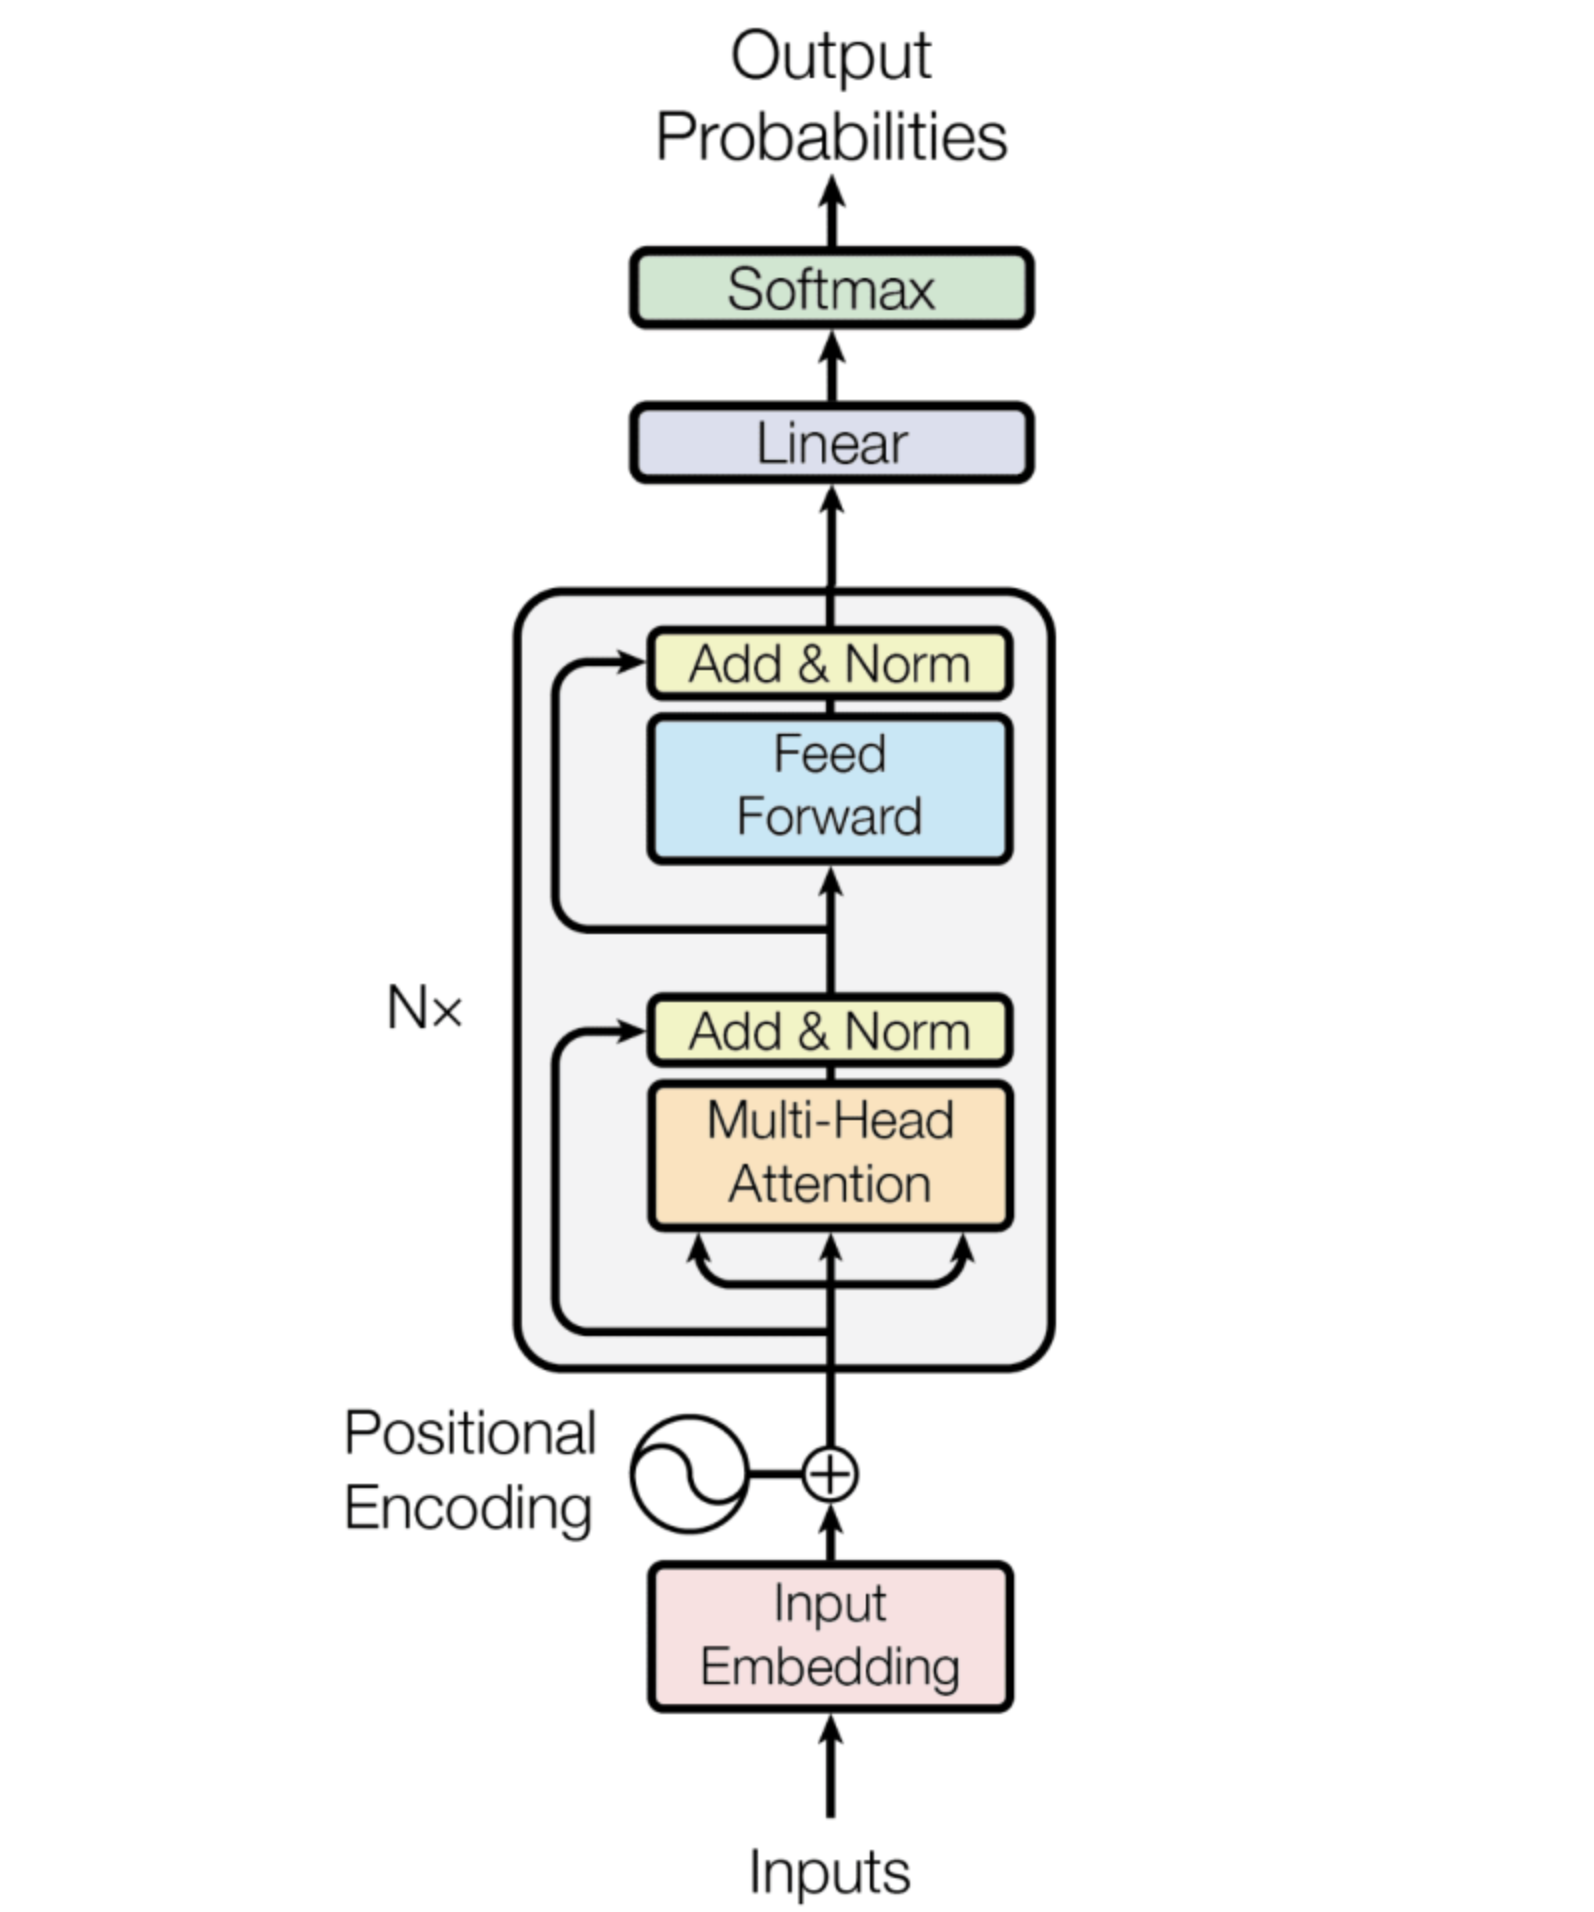

The Transformer’s encoder converts input sequences into dense numerical representations of each token. Encoder-only models discard the decoder, stacking multiple encoder layers to form the architecture. Instead of generating new text, these models focus on interpreting input sequences—for example, identifying missing words. 

Without a decoder, they are ill-suited for text generation but excel at NLU tasks like Named Entity Recognition (NER) and sentiment analysis. BERT’s bidirectional processing allows it to build nuanced contextual understandings, a feature its creators argued gives it an edge over unidirectional models like GPT. They noted that decoder-only architectures are:
*“sub-optimal for sentence-level tasks and potentially detrimental for token-level tasks like question answering when using fine-tuning methods”*

While BERT can technically generate text, this capability is unintended and far inferior to decoder-focused models.

### Pre-training Methodology
GPT’s influence extended beyond architecture; it popularized pre-training—a process where a general-purpose model learns broad linguistic patterns (vocabulary, syntax, etc.) to serve as a foundational base. As shown in the diagrams, this base comprises all layers below the task-specific linear layer (purple). Once pre-trained, copies of this base can be fine-tuned for specialized tasks by training only the final layer (a “classification head”), leaving the base model’s parameters unchanged.

Analogy: Traditional task-specific training resembles teaching someone English using only movie reviews to classify sentiment—a slow, inefficient process. Pre-training, however, starts with a fluent English speaker who needs minimal examples to adapt to the task. This approach drastically reduces training time, cost, and data requirements while enabling versatility across applications.

Though pre-training existed before GPT—exemplified by ELMo (2018) from the Allen Institute, OpenAI demonstrated its superiority decisively. Their work proved that a single pre-trained model could outperform task-specific architectures, stating: *“Our general-purpose model surpasses discriminative models tailored to individual tasks, advancing the state of the art significantly”*

This solidified pre-training as the standard, a paradigm BERT’s creators fully embraced.

### Fine-tuning Mechanics
Fine-tuning revolutionized NLP by eliminating the need to train models from scratch. Instead, pre-trained bases like GPT or BERT could be adapted to new tasks with minimal data and computation. For instance, adjusting the classification head’s output neurons allows BERT to handle binary sentiment analysis (two neurons) or multi-class problems (e.g., 10 neurons for 10 categories). This flexibility made BERT a versatile tool across diverse applications.

Google released Base and Large BERT variants, pre-trained on TPUs over four days. For most users, fine-tuning these models on custom tasks—a process requiring hours, not days, became the practical choice. Thousands of fine-tuned BERT variants now exist on platforms like Hugging Face, highlighting its adaptability.

### Bidirectional Context
BERT’s defining innovation is its bidirectional processing, enabled by its encoder-only design. Unlike GPT’s unidirectional approach (using only preceding context), BERT’s self-attention mechanism considers both preceding and succeeding tokens. This allows deeper contextual understanding for tasks like predicting masked words (e.g., inferring “fishing” from “He cast his net near the riverbank to catch [MASK]”).

Contrast with GPT: Decoder-only models like GPT generate text sequentially, relying solely on leftward context. For example, given “Write a poem: Upon a…”, GPT predicts “river” or “bank” based on prior tokens, unaware of future words. This unidirectionality limits contextual depth compared to BERT’s bidirectional analysis.

## BERT’s Architectural Design

To equip BERT with bidirectional language understanding, its creators devised two interconnected pre-training objectives that leverage both preceding and succeeding contextual clues. These tasks—Masked Language Modeling (MLM) and Next Sentence Prediction (NSP)—were trained on a massive corpus combining English Wikipedia (2.5 billion words) and BookCorpus (800 million words). The interplay of these objectives allowed BERT to develop a nuanced grasp of linguistic patterns and inter-sentence relationships, setting the stage for its success in downstream Natural Language Understanding (NLU) applications.

### Masked Language Modeling (MLM):
Central to BERT’s bidirectional capability, MLM trains the model to infer masked tokens by synthesizing context from both directions. During training, 15% of tokens in each sequence are randomly obscured. However, to prevent a disconnect between pre-training (where [MASK] tokens are frequent) and real-world inference (where they are absent), the masking strategy incorporates randomness:

- 80% of masked tokens are replaced with [MASK]
- 10% are substituted with random tokens
- 10% remain unchanged

This approach ensures BERT learns robust contextual representations without over-relying on explicit masking cues. The task draws inspiration from the Cloze procedure, a psychological assessment tool repurposed in computational linguistics. Training focuses solely on predicting masked tokens, ignoring unmasked positions to optimize computational efficiency. Predictions are evaluated using cross-entropy loss, comparing the model’s output probabilities against the true tokens.

### Next Sentence Prediction (NSP):
To complement MLM’s token-level focus, NSP trains BERT to discern relationships between sentence pairs—a critical skill for tasks like question answering and textual entailment. During data preparation, 50% of training examples pair consecutive sentences (IsNext), while the other 50% pair random sentences (NotNext). Inputs are structured with [SEP] tokens separating the two segments and a [CLS] token prefixed for classification. By learning to identify coherent sentence transitions, BERT develops document-level comprehension essential for complex NLU challenges.

Input Representation Architecture
BERT’s input embeddings synthesize three information streams:

- Positional Embeddings: Unlike the Transformer’s sinusoidal encodings, BERT employs fixed positional vectors, limiting sequences to 512 tokens.
- Segment Embeddings: Distinguish between text segments (e.g., Sentence A vs. B in NSP). Single-segment tasks like MLM default all tokens to Segment A.
- Token Embeddings: Learned vector representations of individual tokens, combined with positional and segment data to form context-aware inputs.
  
### Specialized Token System
BERT’s vocabulary includes five unique tokens critical to its operation:

- [PAD] (ID 0): Fills sequences to the fixed 512-token length
- [UNK] (ID 100): Represents out-of-vocabulary terms
- [CLS] (ID 101): Aggregates sequence-level semantics for classification tasks
- [SEP] (ID 102): Demarcates segment boundaries (1-2 per input)
- [MASK] (ID 103): Facilitates MLM training

These tokens differentiate BERT from decoder-only models like GPT, which lack explicit classification or padding markers.

### Base vs. Large
Google released two BERT configurations to accommodate diverse computational resources:

- BERT Base: 12 encoder layers, 12 attention heads per layer, 768-dimensional embeddings, and 110 million parameters
- BERT Large: 24 encoder layers, 16 attention heads, 1024-dimensional embeddings, and 340 million parameters

The models share a 30,522-token WordPiece vocabulary, with ~1,000 reserved slots for domain-specific customization (e.g., medical jargon). The dimensionality expansion (compared to the original Transformer’s 512 dimensions) enhances representational capacity, while the layered encoder stacks enable deep contextual processing.

### Fine-tuning
Fine-tuning reuses BERT’s pre-trained encoder while replacing the final classification layer. This approach:

- Requires minimal task-specific data
- Reduces training time from weeks to hours
- Preserves linguistic knowledge acquired during pre-training

The modular design allows seamless adaptation across tasks—from binary sentiment classification (2 output neurons) to multi-label scenarios.

BERT’s pre-training framework established a blueprint for modern language models, demonstrating how bidirectional context and task-agnostic pretraining can achieve state-of-the-art NLU performance. While subsequent models have scaled parameters exponentially, BERT’s architectural principles—particularly its encoder-focused design and attention to pretraining-finetuning continuity—remain foundational to NLP research.

## Environment set up

In [1]:
# !pip install transformers datasets torch scikit-learn seqeval matplotlib pandas tqdm bitsandbytes
!pip install -q seqeval bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 16.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but yo

In [2]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForTokenClassification
from transformers import get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import re
import os
from seqeval.metrics import f1_score, precision_score, recall_score, classification_report as seqeval_report

2025-04-22 01:36:48.064584: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745285808.257536      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745285808.309396      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

## Named Entity Recognition

The goal of Named Entity Recognition (NER) is to identify and categorize specific entities—such as people, organizations, locations, and dates—within unstructured text. This involves two key steps:  

1. Boundary Detection: Locating the exact start and end positions of an entity within the text.  
2. Classification: Determining the type of entity (e.g., person, location) based on its context.  


NER is commonly addressed using sequence labeling models, which assign a tag to each word in a sentence. A widely adopted framework for this is the **IOB tagging scheme** (Inside-Outside-Beginning), which standardizes entity annotation:  

- B-{TYPE}: Marks the beginning of an entity chunk (e.g., `B-PER` for the first word in a person’s name).  
- I-{TYPE}: Indicates a word inside an entity chunk (e.g., `I-PER` for subsequent parts of a person’s name).  
- O: Denotes words outside any entity (non-entities).  

The IOB tags are paired with predefined entity types. In this dataset:

- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon 

### Example
Consider the sentence: *"Microsoft, founded by Bill Gates in 1975, is based in Redmond."*  

Using IOB tags:  
- Microsoft: `B-ORG`  
- founded: `O`  
- by: `O`  
- Bill Gates: `B-PER` `I-PER`  
- in: `O`  
- 1975: `B-TIM`  
- is based: `O`  
- in: `O`  
- Redmond: `B-GPE`  

## Data Analysis

In [5]:
print("Loading dataset (this may take a while for large files)...")

try:
    df = pd.read_csv('/kaggle/input/entity-annotated-corpus/ner_dataset.csv', encoding='latin1')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please make sure the CSV file is in the correct location.")

Loading dataset (this may take a while for large files)...
Dataset loaded successfully!


In [6]:
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset shape: (1048575, 4)

First few rows of the dataset:


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [7]:
print("\nColumns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['Sentence #', 'Word', 'POS', 'Tag']


In [8]:
print("\nUnique NER tags and their counts:")
tag_counts = df['Tag'].value_counts()
display(tag_counts)


Unique NER tags and their counts:


Tag
O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: count, dtype: int64

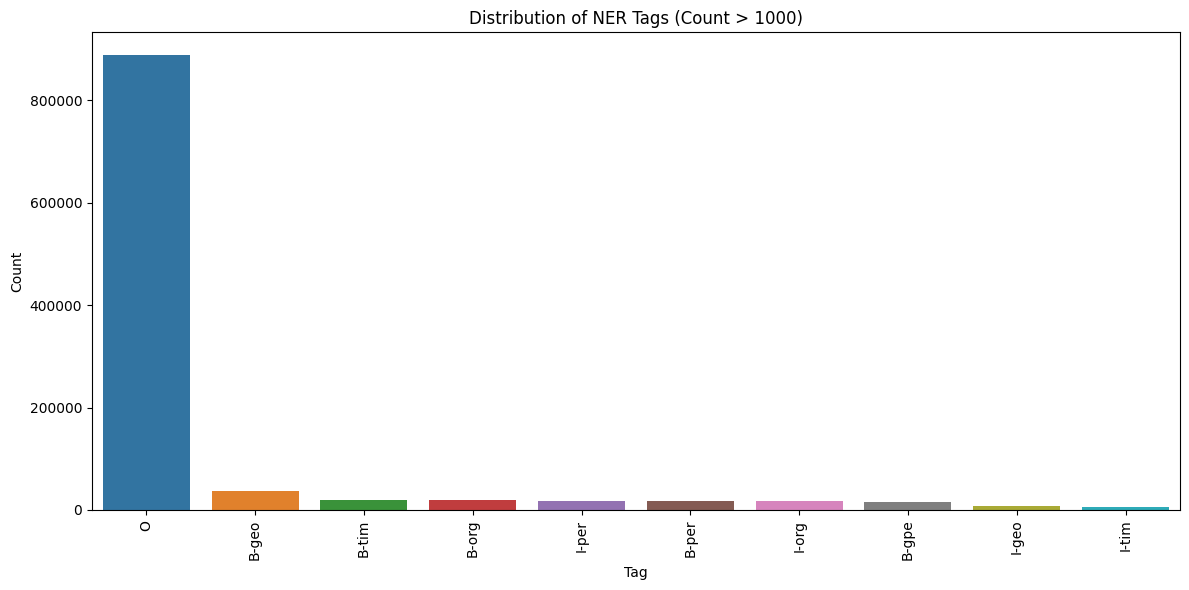

In [9]:
plt.figure(figsize=(12, 6))
tag_counts_filtered = tag_counts[tag_counts > 1000]  # Filter for better visibility
sns.barplot(x=tag_counts_filtered.index, y=tag_counts_filtered.values)
plt.title('Distribution of NER Tags (Count > 1000)')
plt.ylabel('Count')
plt.xlabel('Tag')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
print("\nMissing values in each column:")
display(df.isna().sum())


Missing values in each column:


Sentence #    1000616
Word               10
POS                 0
Tag                 0
dtype: int64

In [11]:
if df.isna().sum().sum() > 0:
    print("Filling missing values...")
    df = df.fillna("O")  # Common practice for NER is to use 'O' (Outside) tag for missing values

Filling missing values...


In [12]:
print("\nGrouping words into sentences...")
sentences = []
tags = []
pos_tags = []
current_sentence = []
current_tags = []
current_pos = []

# Group by sentence
sentence_groups = df.groupby('Sentence #')

# Process each sentence group
for sentence_num, group in tqdm(sentence_groups):
    words = group['Word'].tolist()
    sentence_tags = group['Tag'].tolist()
    sentence_pos = group['POS'].tolist()
    
    # Skip empty sentences
    if len(words) > 0:
        sentences.append(words)
        tags.append(sentence_tags)
        pos_tags.append(sentence_pos)

print(f"Found {len(sentences)} sentences in the dataset.")


Grouping words into sentences...


  0%|          | 0/47960 [00:00<?, ?it/s]

Found 47960 sentences in the dataset.


## Data Preprocessing

Create a simplified tag mapping for demonstration. This is a critical step since BERT expects numeric labels

In [13]:
print("Creating tag mapping with special 'X' tag for subword tokens...")
unique_tags = sorted(list(set([tag for sentence_tags in tags for tag in sentence_tags])))
tag2idx = {tag: idx for idx, tag in enumerate(unique_tags)}
# Add the special 'X' tag for subword tokens
tag2idx['X'] = len(tag2idx)
idx2tag = {idx: tag for tag, idx in tag2idx.items()}

print(f"Number of unique tags: {len(tag2idx)}")
print("Tag to index mapping:")
display(tag2idx) 

Creating tag mapping with special 'X' tag for subword tokens...
Number of unique tags: 18
Tag to index mapping:


{'B-art': 0,
 'B-eve': 1,
 'B-geo': 2,
 'B-gpe': 3,
 'B-nat': 4,
 'B-org': 5,
 'B-per': 6,
 'B-tim': 7,
 'I-art': 8,
 'I-eve': 9,
 'I-geo': 10,
 'I-gpe': 11,
 'I-nat': 12,
 'I-org': 13,
 'I-per': 14,
 'I-tim': 15,
 'O': 16,
 'X': 17}

In [14]:
print("Splitting data into training and validation sets...")
train_sentences, val_sentences, train_tags, val_tags = train_test_split(
    sentences, tags, test_size=0.1, random_state=RANDOM_SEED
)

print(f"Training sentences: {len(train_sentences)}")
print(f"Validation sentences: {len(val_sentences)}")

Splitting data into training and validation sets...
Training sentences: 43164
Validation sentences: 4796


In [15]:
print("Initializing BERT tokenizer...")
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Initializing BERT tokenizer...


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [16]:
class NERDataset(Dataset):    
    def __init__(self, sentences, tags, tokenizer, max_len=128):
        self.sentences = sentences
        self.tags = tags
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.sentences)
    
    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        tags = self.tags[idx]
        
        encoded_sentence = []
        encoded_tags = []
        
        for word, tag in zip(sentence, tags):
            word_tokens = self.tokenizer.tokenize(word)
            
            if len(word_tokens) == 0:
                word_tokens = [self.tokenizer.unk_token]
                
            # Add tokenized word and tags
            encoded_sentence.extend(word_tokens)
            
            # ! Only the first subword gets the actual tag,
            # all other subwords get a special tag 'X'
            encoded_tags.extend([tag] + ['X'] * (len(word_tokens) - 1))
        
        # Add special tokens [CLS] and [SEP]
        encoded_sentence = [self.tokenizer.cls_token] + encoded_sentence + [self.tokenizer.sep_token]
        encoded_tags = ['O'] + encoded_tags + ['O']  # Use 'O' for special tokens
        
        # Convert tokens to ids
        input_ids = self.tokenizer.convert_tokens_to_ids(encoded_sentence)
        tags_ids = [tag2idx[tag] for tag in encoded_tags]
        
        attention_mask = [1] * len(input_ids)
        
        if len(input_ids) < self.max_len:
            # Padding
            input_ids = input_ids + [self.tokenizer.pad_token_id] * (self.max_len - len(input_ids))
            attention_mask = attention_mask + [0] * (self.max_len - len(attention_mask))
            tags_ids = tags_ids + [tag2idx['O']] * (self.max_len - len(tags_ids))
        else:
            # Truncation
            input_ids = input_ids[:self.max_len]
            attention_mask = attention_mask[:self.max_len]
            tags_ids = tags_ids[:self.max_len]
        
        return {
            'input_ids': torch.tensor(input_ids, dtype=torch.long),
            'attention_mask': torch.tensor(attention_mask, dtype=torch.long),
            'labels': torch.tensor(tags_ids, dtype=torch.long)
        }

In [17]:
print("Creating dataset objects...")
train_dataset = NERDataset(train_sentences, train_tags, tokenizer)
val_dataset = NERDataset(val_sentences, val_tags, tokenizer)

Creating dataset objects...


In [18]:
batch_size = 16

train_dataloader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=batch_size
)

print(f"Number of training batches: {len(train_dataloader)}")
print(f"Number of validation batches: {len(val_dataloader)}")

Number of training batches: 2698
Number of validation batches: 300


## Fine-tuning BERT

In [19]:
print("Initializing BERT model for token classification...")
model = BertForTokenClassification.from_pretrained(
    'bert-base-cased', 
    num_labels=len(tag2idx),
    output_attentions=False,
    output_hidden_states=False
)

Initializing BERT model for token classification...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
model.to(device)

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [21]:
from bitsandbytes.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)

In [22]:
epochs = 1
total_steps = len(train_dataloader) * 3

In [23]:
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [24]:
def train_model(model, train_dataloader, val_dataloader, optimizer, scheduler, epochs=3):
    training_stats = []
    
    best_val_f1 = 0
    
    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        print('-' * 40)
        
        print('Training...')
        model.train()
        
        total_train_loss = 0
        train_steps = 0
        
        progress_bar = tqdm(train_dataloader, desc="Training", leave=True)
        
        for batch in progress_bar:
            model.zero_grad()
            
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            
            loss = outputs.loss
            total_train_loss += loss.item()
            
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            
            optimizer.step()
            scheduler.step()
            
            train_steps += 1

            progress_bar.set_postfix({'loss': f"{loss.item():.4f}"})
        
        avg_train_loss = total_train_loss / train_steps
        print(f"Average training loss: {avg_train_loss:.4f}")
        
        print('Evaluating...')
        model.eval()
        
        total_val_loss = 0
        val_steps = 0
        
        true_labels = []
        pred_labels = []
        
        with torch.no_grad():
            for batch in tqdm(val_dataloader, desc="Validation", leave=True):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)
                
                outputs = model(
                    input_ids=input_ids,
                    attention_mask=attention_mask,
                    labels=labels
                )
                
                loss = outputs.loss
                total_val_loss += loss.item()
                
                logits = outputs.logits
                predictions = torch.argmax(logits, dim=2)
                
                for i in range(input_ids.shape[0]):
                    true_sentence = []
                    pred_sentence = []
                    
                    for j in range(1, attention_mask[i].sum() - 1):  # Skip [CLS] and [SEP]
                        true_tag = idx2tag[labels[i][j].item()]
                        pred_tag = idx2tag[predictions[i][j].item()]
                        
                        # Skip special tag for subword continuation
                        if true_tag != 'X':
                            true_sentence.append(true_tag)
                            pred_sentence.append(pred_tag)
                    
                    true_labels.append(true_sentence)
                    pred_labels.append(pred_sentence)
                
                val_steps += 1
        
        avg_val_loss = total_val_loss / val_steps
        print(f"Average validation loss: {avg_val_loss:.4f}")
        
        val_f1 = f1_score(true_labels, pred_labels)
        val_precision = precision_score(true_labels, pred_labels)
        val_recall = recall_score(true_labels, pred_labels)
        
        print(f"Validation F1 Score: {val_f1:.4f}")
        print(f"Validation Precision: {val_precision:.4f}")
        print(f"Validation Recall: {val_recall:.4f}")
        
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            print(f"New best validation F1: {best_val_f1:.4f}. Saving model...")
            model_path = f"bert_ner_epoch_{epoch+1}_f1_{val_f1:.4f}.pt"
            torch.save(model.state_dict(), model_path)
        
        training_stats.append({
            'epoch': epoch + 1,
            'train_loss': avg_train_loss,
            'val_loss': avg_val_loss,
            'val_f1': val_f1,
            'val_precision': val_precision,
            'val_recall': val_recall
        })
    
    return training_stats

In [25]:
print("Starting model training...")
training_stats = train_model(model, train_dataloader, val_dataloader, optimizer, scheduler, epochs)

Starting model training...

Epoch 1/1
----------------------------------------
Training...


Training:   0%|          | 0/2698 [00:00<?, ?it/s]

Average training loss: 0.0058
Evaluating...


Validation:   0%|          | 0/300 [00:00<?, ?it/s]

Average validation loss: 0.0017
Validation F1 Score: 0.8099
Validation Precision: 0.8187
Validation Recall: 0.8012
New best validation F1: 0.8099. Saving model...


## Results

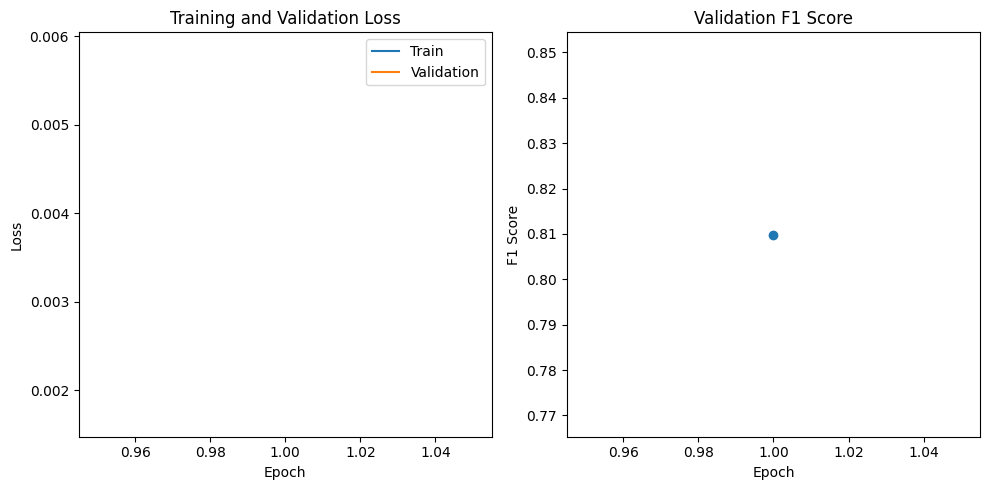

In [26]:
stats_df = pd.DataFrame(training_stats)
stats_df = stats_df.set_index('epoch')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(stats_df.index, stats_df['train_loss'], label='Train')
plt.plot(stats_df.index, stats_df['val_loss'], label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stats_df.index, stats_df['val_f1'], marker='o')
plt.title('Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

In [27]:
def evaluate_model(model, dataloader):
    model.eval()
    
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=2)
            
            for i in range(input_ids.shape[0]):
                true_sentence = []
                pred_sentence = []
                
                # Only evaluate on non-padded tokens
                for j in range(1, attention_mask[i].sum() - 1):  # Skip [CLS] and [SEP]
                    true_tag = idx2tag[labels[i][j].item()]
                    pred_tag = idx2tag[predictions[i][j].item()]
                    
                    # Skip special tag for subword continuation
                    if true_tag != 'X':
                        true_sentence.append(true_tag)
                        pred_sentence.append(pred_tag)
                
                y_true.append(true_sentence)
                y_pred.append(pred_sentence)
    
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    report = seqeval_report(y_true, y_pred)
    print("\nDetailed Classification Report:")
    print(report)
    
    return f1, precision, recall, report

In [28]:
print("Performing detailed evaluation on validation set...")

val_f1, val_precision, val_recall, val_report = evaluate_model(model, val_dataloader)

Performing detailed evaluation on validation set...


Evaluating:   0%|          | 0/300 [00:00<?, ?it/s]

F1 Score: 0.8099
Precision: 0.8187
Recall: 0.8012

Detailed Classification Report:
              precision    recall  f1-score   support

         art       0.00      0.00      0.00         3
         geo       0.68      0.94      0.79       328
         gpe       0.96      0.91      0.94       295
         nat       0.00      0.00      0.00         1
         org       0.91      0.33      0.48       267
         per       0.84      0.94      0.89       404
         tim       0.93      0.69      0.79        55

   micro avg       0.82      0.80      0.81      1353
   macro avg       0.62      0.54      0.56      1353
weighted avg       0.84      0.80      0.79      1353



/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
def predict_entities(text, model, tokenizer):
    tokens = text.split()
    
    bert_tokens = []
    orig_to_bert_map = []
    
    for token in tokens:
        orig_to_bert_map.append(len(bert_tokens) + 1) 
        
        subwords = tokenizer.tokenize(token)
        
        if len(subwords) == 0:
            subwords = ['[UNK]']
            
        bert_tokens.extend(subwords)
    
    bert_tokens = ['[CLS]'] + bert_tokens + ['[SEP]']
    
    input_ids = tokenizer.convert_tokens_to_ids(bert_tokens)
    
    attention_mask = [1] * len(input_ids)
    
    max_len = 128
    padding_length = max_len - len(input_ids)
    
    if padding_length > 0:
        input_ids = input_ids + ([0] * padding_length)
        attention_mask = attention_mask + ([0] * padding_length)
    else:
        input_ids = input_ids[:max_len]
        attention_mask = attention_mask[:max_len]
    
    input_ids = torch.tensor([input_ids], dtype=torch.long).to(device)
    attention_mask = torch.tensor([attention_mask], dtype=torch.long).to(device)
    
    model.eval()
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=2)
    
    pred_tags = [idx2tag[p.item()] for p in predictions[0]]
    
    result = []
    for i, token in enumerate(tokens):
        bert_idx = orig_to_bert_map[i]
        if bert_idx < len(pred_tags):
            pred_tag = pred_tags[bert_idx]
            if pred_tag != 'O' and pred_tag != 'X':
                result.append((token, pred_tag))
    
    return result

In [30]:
example_sentences = [
    "Donald Trump visited New York City last September.",
    "Apple Inc. is planning to open a new store in Berlin, Germany next month.",
    "The European Union has imposed new sanctions on Russia."
]

In [31]:
print("Performing inference on example sentences:")

for sentence in example_sentences:
    print(f"\nSentence: {sentence}")
    entities = predict_entities(sentence, model, tokenizer)
    print("Predicted entities:")
    for entity, tag in entities:
        print(f"  {entity}: {tag}")

Performing inference on example sentences:

Sentence: Donald Trump visited New York City last September.
Predicted entities:
  Donald: B-per

Sentence: Apple Inc. is planning to open a new store in Berlin, Germany next month.
Predicted entities:
  Apple: B-org

Sentence: The European Union has imposed new sanctions on Russia.
Predicted entities:
  Russia.: B-geo


## Saving model

In [32]:
final_model_path = "bert_ner_final.pt"

torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'tag2idx': tag2idx,
    'idx2tag': idx2tag
}, final_model_path)

print(f"Model saved to {final_model_path}")

Model saved to bert_ner_final.pt


In [33]:
def load_model(model_path):
    checkpoint = torch.load(model_path, map_location=device)
    
    loaded_model = BertForTokenClassification.from_pretrained(
        'bert-base-cased',
        num_labels=len(checkpoint['tag2idx']),
        output_attentions=False,
        output_hidden_states=False
    )
    
    loaded_model.load_state_dict(checkpoint['model_state_dict'])
    loaded_model.to(device)
    
    return loaded_model, checkpoint['tag2idx'], checkpoint['idx2tag']

In [34]:
print("Demonstrating model loading:")
loaded_model, loaded_tag2idx, loaded_idx2tag = load_model(final_model_path)
print("Model loaded successfully!")

Demonstrating model loading:


/tmp/ipykernel_20/783456139.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)
Some weights of BertForTokenClassifi

Model loaded successfully!
